<a href="https://colab.research.google.com/github/DiegoCorona/TensorFlow2-for-Deep-Learning/blob/main/Week2_Customising_your_models_with_TensorFlow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# Data Pipeline

 ## Coding tutorials
 #### [1. Keras datasets](#coding_tutorial_1)
 #### [2. Dataset generators](#coding_tutorial_2)
 #### [3. Keras image data augmentation](#coding_tutorial_3)
 #### [4. The Dataset class](#coding_tutorial_4)
 #### [5. Training with Datasets](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Keras datasets

For a list of Keras datasets and documentation on recommended usage, see [this link](https://keras.io/datasets/).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Load the CIFAR-100 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
# Confirm that reloading the dataset does not require a download
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

#### Examine the Dataset

#### Import the Data

The additional files required for this tutorial can be downloaded from the following link:

cifar100_fine_labels: https://drive.google.com/open?id=1WFW1cj8v_5z1pGvq6htQyFUPrJP-Z2v5

cifar100_coarse_labels: https://drive.google.com/open?id=1Jmt7o-6sP85D7iRORk5tJqJMN3wCP12p

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Examine the shape of the data.
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


[41]


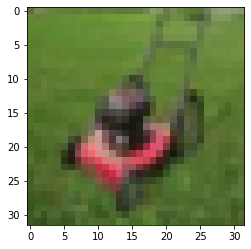

In [ ]:
# Examine one of the images and its corresponding label
plt.imshow(train_images[500])
print(train_labels[500])

In [ ]:
# Load the list of labels from a JSON file
# Please use your own path once you have downloaded the .json file and mounted your Drive

import json

with open('/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/cifar100_fine_labels.json', 'r') as fine_labels:
    cifar100_fine_labels = json.load(fine_labels)

The list of labels for the CIFAR-100 dataset are available [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [ ]:
# Print a few of the labels
cifar100_fine_labels[0:10]

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle']

lawn_mower


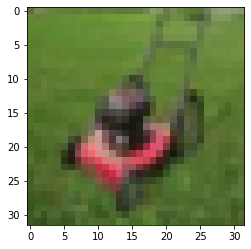

In [ ]:
# Print the corresponding label for the example above
plt.imshow(train_images[500])
print(cifar100_fine_labels[train_labels[500][0]])

#### Load the data using different label modes

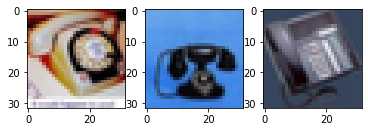

In [ ]:
# Display a few examples from category 87 (index 86) and the list of labels

examples = train_images[(train_labels.T == 86)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Reload the data using the 'coarse' label mode
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode= 'coarse')

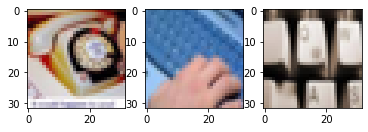

In [ ]:
# Display three images from the dataset with the label 6 (index 5)
examples = train_images[(train_labels.T == 5)[0]][:3]
fig, ax = plt.subplots(1,3)
ax[0].imshow(examples[0])
ax[1].imshow(examples[1])
ax[2].imshow(examples[2])

In [ ]:
# Load the list of coarse labels from a JSON file
with open('/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/cifar100_coarse_labels.json', 'r') as coarse_labels:
    cifar100_coarse_labels = json.load(coarse_labels)

In [ ]:
# Print a few of the labels
cifar100_coarse_labels[0:10]

['aquatic mammals',
 'fish',
 'flowers',
 'food containers',
 'fruit and vegetables',
 'household electrical device',
 'household furniture',
 'insects',
 'large carnivores',
 'large man-made outdoor things']

In [ ]:
# Print the corresponding label for the example above
print(cifar100_fine_labels[86])
print(cifar100_coarse_labels[5])

telephone
household electrical device


#### Load the IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# Print an example from the training dataset, along with its corresponding label
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


#### Using Keyword Arguments

In [ ]:
# Load the data ignoring the 50 most frequent words, use oov_char=2 (this is the default)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(skip_top=50, oov_char=2 )

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

2494
11


In [ ]:
# Define functions for filtering the sequences

def remove_oov_char(element):
    ''' Filter function for removing the oov_char. '''
    return [word for word in element if word!=2]

def filter_list(lst):
    ''' Run remove_oov_char on elements in a list. '''
    return [remove_oov_char(element) for element in lst]

In [ ]:
# Remove the oov_char from the sequences using the filter_list function
train_data = filter_list(train_data)

In [ ]:
# Get the lengths of the input sequences
sequence_lengths = [len(seq) for seq in train_data]

In [ ]:
# Determine the maximum and minimum sequence length
print(np.max(sequence_lengths))
print(np.min(sequence_lengths))

1648
3


***
<a id="coding_tutorial_2"></a>
## Dataset generators

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the UCI Fertility Dataset

We will be using a dataset available at https://archive.ics.uci.edu/ml/datasets/Fertility from UC Irvine.

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1OA0lwa5YLDs1njS377jbqPpMSlH5TzQV

You should store this file in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the fertility dataset
# Please use your own path once you have downloaded the dataset and mounted your Drive

headers = ['Season', 'Age', 'Diseases', 'Trauma', 'Surgery', 'Fever', 'Alcohol', 'Smoking', 'Sitting', 'Output']
fertility = pd.read_csv('/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/fertility_Diagnosis.txt', 
                        delimiter=',', header=None, names=headers)

In [ ]:
# Print the shape of the DataFrame
fertility.shape

(100, 10)

In [ ]:
# Show the head of the DataFrame
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


#### Process the data

In [ ]:
# Map the 'Output' feature from 'N' to 0 and from 'O' to 1
fertility['Output'] = fertility['Output'].map(lambda x : 0.0 if x=='N' else 1.0)

In [ ]:
# Show the head of the DataFrame
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0.0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1.0
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0.0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0.0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1.0


In [ ]:
# Convert the DataFrame so that the features are mapped to floats
fertility = fertility.astype('float32')

In [ ]:
# Shuffle the DataFrame
fertility = fertility.sample(frac=1).reset_index(drop=True)

In [ ]:
# Show the head of the DataFrame
fertility.head()

,Season,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output
0,-1.00,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,0.0
1,-1.00,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,0.0
2,-0.33,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.63,0.0
3,1.00,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,1.0
4,-0.33,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0


In [ ]:
# Convert the field Season to a one-hot encoded vector
fertility = pd.get_dummies(fertility, prefix='Season', columns=['Season'])

In [ ]:
# Show the head of the DataFrame
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,0.0,1,0,0,0
2,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0
3,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,1.0,0,0,0,1
4,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0,0,1,0,0


*N.B. The below cell has been updated since the coding tutorial.*

In [ ]:
# Move the Output column such that it is the last column in the DataFrame
fertility.reindex(columns = [col for col in fertility.columns if col != 'Output'] + ['Output'])

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0,Output
0,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,1,0,0,0,0.0
1,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,1,0,0,0,0.0
2,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.63,0,1,0,0,0.0
3,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,0,0,0,1,1.0
4,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.58,0.0,0.0,0.0,1.0,0.8,1.0,0.44,0,0,0,1,0.0
96,0.83,1.0,1.0,1.0,0.0,1.0,-1.0,0.31,0,1,0,0,0.0
97,0.53,1.0,1.0,0.0,1.0,1.0,0.0,0.31,1,0,0,0,0.0
98,0.53,1.0,1.0,0.0,0.0,0.8,0.0,0.75,0,1,0,0,0.0


In [ ]:
# Show the head of the DataFrame
fertility.head()

,Age,Diseases,Trauma,Surgery,Fever,Alcohol,Smoking,Sitting,Output,Season_-1.0,Season_-0.33000001311302185,Season_0.33000001311302185,Season_1.0
0,0.58,1.0,0.0,1.0,-1.0,0.8,1.0,0.50,0.0,1,0,0,0
1,0.53,1.0,0.0,0.0,1.0,0.8,-1.0,0.31,0.0,1,0,0,0
2,0.56,1.0,0.0,0.0,0.0,1.0,-1.0,0.63,0.0,0,1,0,0
3,0.69,1.0,0.0,1.0,-1.0,1.0,-1.0,0.44,1.0,0,0,0,1
4,0.92,1.0,1.0,0.0,1.0,1.0,-1.0,0.63,0.0,0,1,0,0


In [ ]:
# Convert the DataFrame to a numpy array.
fertility = fertility.to_numpy()

#### Split the Data

In [ ]:
# Split the dataset into training and validation set
training = fertility[0:70]
validation = fertility[70:100]

In [ ]:
# Verify the shape of the training data
training.shape

(70, 13)

In [ ]:
# Separate the features and labels for the validation and training data
training_features = training[:,0:-1]
training_labels = training[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

#### Create the Generator

In [ ]:
# Create a function that returns a generator producing inputs and labels
def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])

In [ ]:
# Apply the function to our training features and labels with a batch size of 10
train_generator = get_generator(training_features, training_labels, batch_size=10)

In [ ]:
# Test the generator using the next() function
next(train_generator)

(array([[ 0.94,  1.  ,  1.  ,  1.  ,  0.  ,  0.2 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.94,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.31,  1.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.58,  1.  ,  0.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.19,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.64,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.19,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.75,  0.  ,  1.  ,  1.  ,  0.  ,  1.  , -1.  ,  0.38,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  1.  ,  0.  ,  0.8 ,  1.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.89,  1.  ,  1.  ,  0.  ,  0.  ,  0.6 ,  1.  ,  0.31,  0.  ,
          0.  ,  1.  ,  0.  ],
        [ 0.67,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 , -1.  ,  0.25,  0.  ,
          0.  ,  0.  ,  0.  ],
        [ 0.67,  1.  ,  0.  ,  0.  ,  0.  ,  1.  , -1.  ,  0.5 ,  0.  ,
          1.  ,  0.  ,  0.  ],
        [ 0.53,  1.  ,  1.  ,  0.  ,  0.  ,  0.8 ,  0.  ,  0.5 ,  0.  ,
 

#### Build the model

In [ ]:
# Create a model using Keras with 3 layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, BatchNormalization

input_shape = (12,)
output_shape = (1,)

model_input = Input(input_shape)
batch_1 = BatchNormalization(momentum=0.8)(model_input)
dense_1 = Dense(100, activation='relu')(batch_1)
batch_2 = BatchNormalization(momentum=0.8)(dense_1)
output = Dense(1, activation='sigmoid')(batch_2)

model = Model([model_input], output)

In [ ]:
# Display the model summary to show the resultant structure
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 100)               1300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,849
Trainable params: 1,625
Non-trainable params: 224
_________________________________________________________________


#### Compile the model

In [ ]:
# Create the optimizer object
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

In [ ]:
# Compile the model with loss function and metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### Train and evaluate the model using the generator

In [ ]:
# Calculate the number of training steps per epoch for the given batch size.
batch_size = 5
train_steps = len(training) // batch_size

In [ ]:
# Set the epochs to 3
epochs = 3

In [ ]:
# Train the mode
for epoch in range(epochs):
  train_generator = get_generator(training_features, training_labels, batch_size=batch_size)
  validation_generator = get_generator(validation_features, validation_labels, batch_size=30)
  model.fit_generator(train_generator, steps_per_epoch=train_steps, validation_data= validation_generator, validation_steps=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


14/14 [==============================] - 0s 9ms/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 0.0027 - val_accuracy: 1.0000


In [ ]:
# Try to run the fit_generator function once more; observe what happens
model.fit_generator(train_generator, steps_per_epoch=train_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


StopIteration: ignored

#### Make an infinitely looping generator

In [ ]:
# Create a function that returns an infinitely looping generator
def get_generator_cyclic(features, labels, batch_size=1):
  while True:
    for n in range(int(len(features)/batch_size)):
      yield (features[n*batch_size: (n+1)*batch_size], labels[n*batch_size: (n+1)*batch_size])
    permuted = np.random.permutation(len(features))
    features = features[permuted]
    labels = features[permuted]

In [ ]:
# Create a generator using this function.
train_generator_cyclic = get_generator_cyclic(training_features, training_labels, batch_size=batch_size)

In [ ]:
# Assert that the new cyclic generator does not raise a StopIteration
for i in range(2*train_steps):
    next(train_generator_cyclic)

In [ ]:
# Generate a cyclic validation generator
validation_generator_cyclic = get_generator_cyclic(validation_features, validation_labels, batch_size=batch_size)

In [ ]:
# Train the model
model.fit_generator(train_generator_cyclic, steps_per_epoch=train_steps,
                    validation_data = validation_generator_cyclic, validation_steps = 1, epochs = 3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
14/14 [==============================] - 0s 6ms/step - loss: 1.6978 - accuracy: 0.3869 - val_loss: 0.1390 - val_accuracy: 1.0000
Epoch 2/3
14/14 [==============================] - 0s 4ms/step - loss: 0.7787 - accuracy: 0.3952 - val_loss: 0.9011 - val_accuracy: 0.4000
Epoch 3/3
14/14 [==============================] - 0s 5ms/step - loss: 0.7034 - accuracy: 0.4024 - val_loss: 0.7312 - val_accuracy: 0.4000


#### Evaluate the model and get predictions

In [ ]:
# Let's obtain a validation data generator.
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
# Get predictions on the validation data
predictions = model.predict_generator(validation_generator, steps=1)
print(np.round(predictions.T[0]))

[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# Print the corresponding validation labels
print(validation_labels)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0.]


In [ ]:
# Obtain a validation data generator
validation_generator = get_generator(validation_features, validation_labels, batch_size=30)

In [ ]:
# Evaluate the model
model.evaluate(validation_generator)

1/1 [==============================] - 0s 36ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931101679801941, 0.5]

***
<a id="coding_tutorial_3"></a>
## Keras image data augmentation

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=11Y43ta5gT672L3sfJFR2DvPs-ralY5Pd

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#### Load the CIFAR-10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load the CIFAR-10 dataset
(training_features, training_labels), (test_features, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# Convert the labels to a one-hot encoding

num_classes = 10

training_labels = tf.keras.utils.to_categorical(training_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

#### Create a generator function

In [ ]:
# Create a function that returns a data generator
def get_generator(features, labels, batch_size=1):
    for n in range(int(len(features)/batch_size)):
        yield (features[n*batch_size:(n+1)*batch_size], labels[n*batch_size:(n+1)*batch_size])

In [ ]:
# Use the function we created to get a training data generator with a batch size of 1
training_generator = get_generator(training_features, training_labels)

In [ ]:
# Assess the shape of the items generated by training_generator using the `next` function to yield an item.
image, label = next(training_generator)
print(image.shape)
print(label.shape)

(1, 32, 32, 3)
(1, 10)


[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


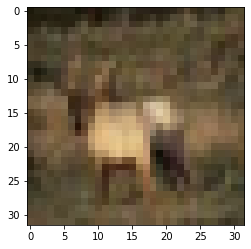

In [ ]:
# Test the training generator by obtaining an image using the `next` generator function, and then using imshow to plot it.
# Print the corresponding label
from matplotlib.pyplot import imshow

image, label = next(training_generator)
image_unbatched = image[0,:,:,:]
imshow(image_unbatched)
print(label)

In [ ]:
# Reset the generator by re-running the `get_generator` function.
train_generator = get_generator(training_features, training_labels)

#### Create a data augmentation generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create a function to convert an image to monochrome
def monochrome(x):
    def func_bw(a):
        average_colour = np.mean(a)
        return [average_colour, average_colour, average_colour]
    x = np.apply_along_axis(func_bw, -1, x)
    return x

In [ ]:
# Create an ImageDataGenerator object
image_generator = ImageDataGenerator(preprocessing_function= monochrome,
                                     rotation_range = 180,
                                     rescale = (1/255.0),)

image_generator.fit(training_features)

Check [the documentation](https://keras.io/preprocessing/image/) for the full list of image data augmentation options. 

In [ ]:
# Create an iterable generator using the `flow` function
image_generator_iterable = image_generator.flow(training_features, training_labels, batch_size=1, shuffle=False)

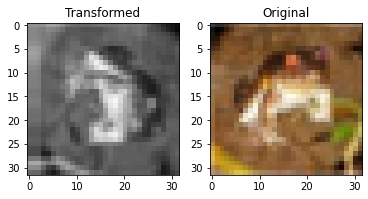

In [ ]:
# Show a sample from the generator and compare with the original
image, label = next(image_generator_iterable)
image_orig, label_orig = next(train_generator)
figs, axes = plt.subplots(1,2)
axes[0].imshow(image[0,:,:,:])
axes[0].set_title('Transformed')
axes[1].imshow(image_orig[0,:,:,:])
axes[1].set_title('Original')
plt.show()

#### Flow from directory

In [ ]:
# Inspect the directory structure
# Please use your own path once you have downloaded the dataset and mounted your Drive

train_path = '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/flowers-recognition-split/train'
val_path = '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/flowers-recognition-split/val'

In [ ]:
# Create an ImageDataGenerator object
datagenerator = ImageDataGenerator(rescale=(1/255.0))

In [ ]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
# Create a training data generator
training_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


In [ ]:
# Create a validation data generator
val_generator = datagenerator.flow_from_directory(val_path, batch_size=64, classes=classes, target_size=(16,16))

Found 1296 images belonging to 5 classes.


[0. 0. 0. 1. 0.]


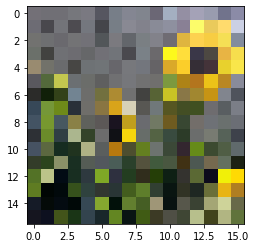

In [ ]:
# Get and display an image and label from the training generator
x = next(training_generator)
imshow(x[0][4])
print(x[1][4])

In [ ]:
# Reset the training generator
training_generator = datagenerator.flow_from_directory(train_path, batch_size=64, classes=classes, target_size=(16,16))

Found 3027 images belonging to 5 classes.


#### Create a model to train

In [ ]:
# Build a CNN model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((16,16,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Create an optimizer object
optimizer = tf.keras.optimizers.Adam(1e-3)

In [ ]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 8)         1544      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 8)           4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 4)           516       
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                2

#### Train the model

In [ ]:
# Calculate the training generator and test generator steps per epoch
train_steps_per_epoch = training_generator.n // training_generator.batch_size
val_steps = val_generator.n // val_generator.batch_size
print(train_steps_per_epoch, val_steps)

47 20


In [ ]:
# Fit the model
model.fit_generator(training_generator, steps_per_epoch=train_steps_per_epoch, epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
47/47 [==============================] - 565s 12s/step - loss: 1.5966 - accuracy: 0.2494
Epoch 2/5
47/47 [==============================] - 12s 262ms/step - loss: 1.5576 - accuracy: 0.2801
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 1.5169 - accuracy: 0.2960
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 1.4745 - accuracy: 0.3358
Epoch 5/5
47/47 [==============================] - 12s 254ms/step - loss: 1.4219 - accuracy: 0.3996


#### Evaluate the model

In [ ]:
# Evaluate the model
model.evaluate_generator(val_generator, steps = val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.4154080152511597, 0.4117187559604645]

#### Predict using the generator

In [ ]:
# Predict labels with the model
pred = model.predict(val_generator, steps = 1)
print(np.round(pred, 2))

[[0.15 0.2  0.08 0.34 0.23]
 [0.05 0.49 0.02 0.25 0.19]
 [0.22 0.27 0.22 0.12 0.16]
 [0.22 0.3  0.14 0.17 0.18]
 [0.03 0.61 0.01 0.19 0.17]
 [0.03 0.08 0.01 0.66 0.22]
 [0.02 0.05 0.01 0.74 0.19]
 [0.03 0.1  0.01 0.66 0.2 ]
 [0.08 0.13 0.05 0.47 0.27]
 [0.04 0.24 0.01 0.48 0.23]
 [0.01 0.06 0.   0.76 0.17]
 [0.17 0.36 0.1  0.18 0.19]
 [0.26 0.27 0.19 0.12 0.15]
 [0.13 0.39 0.07 0.21 0.2 ]
 [0.02 0.09 0.01 0.63 0.25]
 [0.21 0.22 0.22 0.16 0.2 ]
 [0.26 0.35 0.16 0.1  0.13]
 [0.   0.02 0.   0.89 0.09]
 [0.11 0.16 0.09 0.37 0.27]
 [0.02 0.08 0.01 0.7  0.19]
 [0.23 0.28 0.18 0.13 0.17]
 [0.21 0.35 0.09 0.18 0.17]
 [0.25 0.28 0.19 0.13 0.15]
 [0.11 0.32 0.04 0.31 0.21]
 [0.22 0.35 0.2  0.1  0.14]
 [0.12 0.22 0.06 0.36 0.24]
 [0.17 0.48 0.17 0.06 0.12]
 [0.03 0.09 0.01 0.64 0.23]
 [0.25 0.18 0.15 0.22 0.2 ]
 [0.06 0.13 0.05 0.48 0.29]
 [0.1  0.61 0.05 0.09 0.14]
 [0.03 0.12 0.01 0.66 0.19]
 [0.01 0.06 0.01 0.68 0.24]
 [0.22 0.23 0.23 0.14 0.18]
 [0.   0.03 0.   0.79 0.17]
 [0.25 0.35 0.17 0.1

***
<a id="coding_tutorial_4"></a>
## The Dataset Class

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1BAjGPFlpqsDdWof50Ng3Fmju5O8F1_uZ

You should store these files in Drive for use in this Colab notebook.

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#### Create a simple dataset

In [ ]:
x = np.zeros((100,10,2,2))

In [ ]:
# Create a dataset from the tensor x
dataset1 = tf.data.Dataset.from_tensor_slices(x)

In [ ]:
# Inspect the Dataset object
print(dataset1)
print(dataset1.element_spec)

<TensorSliceDataset shapes: (10, 2, 2), types: tf.float64>
TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None)


In [ ]:
x2 = [np.zeros((10,2,2)), np.zeros((5,2,2))]

In [ ]:
# Try creating a dataset from the tensor x2
dataset2 = tf.data.Dataset.from_tensor_slices(x2) ## Manda error por que los elementos dson de distinto tamaño

ValueError: ignored

In [ ]:
x2 = [np.zeros((10,1)), np.zeros((10,1)), np.zeros((10,1))]

In [ ]:
# Create another dataset from the new x2 and inspect the Dataset object
dataset2 = tf.data.Dataset.from_tensor_slices(x2)

In [ ]:
# Print the element_spec
print(dataset2.element_spec)

TensorSpec(shape=(10, 1), dtype=tf.float64, name=None)


#### Create a zipped dataset

In [ ]:
# Combine the two datasets into one larger dataset
dataset_zipped = tf.data.Dataset.zip((dataset1, dataset2))

In [ ]:
# Print the element_spec
print(dataset_zipped.element_spec)

(TensorSpec(shape=(10, 2, 2), dtype=tf.float64, name=None), TensorSpec(shape=(10, 1), dtype=tf.float64, name=None))


In [ ]:
# Define a function to find the number of batches in a dataset
def get_batches(dataset):
    iter_dataset = iter(dataset)
    i = 0
    try:
        while next(iter_dataset):
            i = i+1
    except:
        return i

In [ ]:
# Find the number of batches in the zipped Dataset
get_batches(dataset_zipped)

3

#### Create a dataset from numpy arrays

In [ ]:
# Load the MNIST dataset
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

print(type(train_features), type(train_labels))

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Create a Dataset from the MNIST data
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))

In [ ]:
# Inspect the Dataset object
print(mnist_dataset.element_spec)

(TensorSpec(shape=(28, 28), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))


In [ ]:
# Inspect the length of an element using the take method
element = next(iter(mnist_dataset.take(1)))
print(len(element))

2


In [ ]:
# Examine the shapes of the data
print(element[0].shape)
print(element[1].shape)

(28, 28)
()


#### Create a dataset from text data

In [ ]:
# Print the list of text files
import pprint
text_files = sorted([f.path for f in os.scandir('/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare')])
pprint.pprint(text_files)

['/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.1.1.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.1.2.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.2.1.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.2.2.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.3.1.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.3.2.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.3.3.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow '
 '2/Week2/shakespeare/tempest.4.1.txt',
 '/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflo

In [ ]:
# Load the first file using python and print the first 5 lines.
with open(text_files[0], 'r') as fil:
    contents = [fil.readline() for i in range(5)]
    for line in contents:
        print(line)

SCENE I. On a ship at sea: a tempestuous noise

of thunder and lightning heard.

Enter a Master and a Boatswain



Master



In [ ]:
# Load the lines from the files into a dataset using TextLineDataset
shakespeare_dataset = tf.data.TextLineDataset(text_files)

In [ ]:
# Use the take method to get and print the first 5 lines of the dataset
first_5_lines_dataset = iter(shakespeare_dataset.take(5))
lines = [line for line in first_5_lines_dataset]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)
tf.Tensor(b'Enter a Master and a Boatswain', shape=(), dtype=string)
tf.Tensor(b'', shape=(), dtype=string)
tf.Tensor(b'Master', shape=(), dtype=string)


In [ ]:
# Compute the number of lines in the first file
lines = []
with open(text_files[0], 'r') as fil:
    line = fil.readline()
    while line:
        lines.append(line)
        line = fil.readline()
    print(len(lines))

121


In [ ]:
# Compute the number of lines in the shakespeare dataset we created
shakespeare_dataset_iterator = iter(shakespeare_dataset)
lines = [line for line in shakespeare_dataset_iterator]
print(len(lines))

3134


#### Interleave lines from the text data files

In [ ]:
# Create a dataset of the text file strings
text_files_dataset = tf.data.Dataset.from_tensor_slices(text_files)
files = [file for file in text_files_dataset]
for file in files:
    print(file)

tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.1.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.1.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.2.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.2.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.3.1.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.3.2.txt', shape=(), dtype=string)
tf.Tensor(b'/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/shakespeare/tempest.3.3.txt', sh

In [ ]:
# Interleave the lines from the text files
interleaved_shakespeare_dataset = text_files_dataset.interleave(tf.data.TextLineDataset, cycle_length=9)
print(interleaved_shakespeare_dataset)

<InterleaveDataset shapes: (), types: tf.string>


In [ ]:
# Print the first 10 elements of the interleaved dataset
lines = [line for line in iter(interleaved_shakespeare_dataset.take(10))]
for line in lines:
    print(line)

tf.Tensor(b'SCENE I. On a ship at sea: a tempestuous noise', shape=(), dtype=string)
tf.Tensor(b"SCENE II. The island. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE I. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S Cell.", shape=(), dtype=string)
tf.Tensor(b'SCENE II. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b'SCENE III. Another part of the island.', shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b"SCENE I. Before PROSPERO'S cell.", shape=(), dtype=string)
tf.Tensor(b'of thunder and lightning heard.', shape=(), dtype=string)


***
<a id="coding_tutorial_5"></a>
## Training with Datasets

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf


#### Load the UCI Bank Marketing Dataset

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1cNtP4iDyGhF620ZbmJdmJWYQrRgJTCum

You should store these files in Drive for use in this Colab notebook.

In [2]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load the CSV file into a pandas DataFrame
# Please use your own path once you have downloaded the dataset and mounted your Drive

bank_dataframe = pd.read_csv('/content/gdrive/MyDrive/Course_2 Customising your models with Tensoflow 2/Week2/bank/bank-full.csv', delimiter=';')

In [4]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Print the shape of the DataFrame
print(bank_dataframe.shape)

(45211, 17)


In [6]:
# Select features from the DataFrame
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
            'loan', 'contact', 'campaign', 'pdays', 'poutcome']
labels = ['y']

bank_dataframe = bank_dataframe.filter(features + labels)

In [7]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,unknown,no


#### Preprocess the data

In [8]:
# Convert the categorical features in the DataFrame to one-hot encodings

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
categorical_features = ['default', 'housing', 'job', 'loan', 'education', 'contact', 'poutcome']

for feature in categorical_features:
    bank_dataframe[feature] = tuple(encoder.fit_transform(bank_dataframe[feature]))

In [9]:
# Show the head of the DataFrame
bank_dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,poutcome,y
0,58,"(0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 1, 0)","(0,)",2143,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
1,44,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",single,"(0, 1, 0, 0)","(0,)",29,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
2,33,"(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 1, 0, 0)","(0,)",2,"(1,)","(1,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
3,47,"(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",married,"(0, 0, 0, 1)","(0,)",1506,"(1,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no
4,33,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)",single,"(0, 0, 0, 1)","(0,)",1,"(0,)","(0,)","(0, 0, 1)",1,-1,"(0, 0, 0, 1)",no


*N.B. The below cell has been updated to correct the name of a variable and differs from the Coding Tutorial video.*

In [10]:
# Shuffle the DataFrame
bank_dataframe = bank_dataframe.sample(frac=1).reset_index(drop=True) ### SHUFFLE para evitar el sesgo 

#### Create the Dataset object

*N.B. Please use ``bank_dataframe.to_dict(orient='list')`` to convert the correct dataframe to a dictionary suitable for use in the ``from_tensor_slices`` function, rather than ``dict(dataframe)`` as specified in the coding tutorial video.*

In [15]:
# Convert the DataFrame to a Dataset
bank_dataset = tf.data.Dataset.from_tensor_slices(bank_dataframe.to_dict(orient='list'))

In [16]:
# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.string, name=None)}

#### Filter the Dataset

In [17]:
# First check that there are records in the dataset for non-married individuals
def check_divorced():
    bank_dataset_iterable = iter(bank_dataset)
    for x in bank_dataset_iterable:
        if x['marital'] != 'divorced':
            print('Found a person with marital status: {}'.format(x['marital']))
            return
    print('No non-divorced people were found!')

check_divorced()

Found a person with marital status: b'single'


In [18]:
# Filter the Dataset to retain only entries with a 'divorced' marital status
bank_dataset = bank_dataset.filter(lambda x : tf.equal(x['marital'], tf.constant([b'divorced']))[0] )

In [19]:
# Check the records in the dataset again
check_divorced()

No non-divorced people were found!


#### Map a function over the dataset

In [21]:
# Convert the label ('y') to an integer instead of 'yes' or 'no'
def map_label(x):
  x['y'] = 0 if (x['y'] == tf.constant([b'no'], dtype=tf.string)) else 1
  return x

bank_dataset = bank_dataset.map(map_label)

In [22]:
# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'marital': TensorSpec(shape=(), dtype=tf.string, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

In [23]:
# Remove the 'marital' column
bank_dataset = bank_dataset.map(lambda x : {key:val for key, val in x.items() if key != 'marital'})

In [24]:
# Inspect the Dataset object
bank_dataset.element_spec

{'age': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'balance': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'campaign': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'contact': TensorSpec(shape=(3,), dtype=tf.int32, name=None),
 'default': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'education': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'housing': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'job': TensorSpec(shape=(12,), dtype=tf.int32, name=None),
 'loan': TensorSpec(shape=(1,), dtype=tf.int32, name=None),
 'pdays': TensorSpec(shape=(), dtype=tf.int32, name=None),
 'poutcome': TensorSpec(shape=(4,), dtype=tf.int32, name=None),
 'y': TensorSpec(shape=(), dtype=tf.int32, name=None)}

#### Create input and output data tuples

In [25]:
# Create an input and output tuple for the dataset
def map_feature_label(x):
    features = [[x['age']], [x['balance']], [x['campaign']], x['contact'], x['default'],
                x['education'], x['housing'], x['job'], x['loan'], [x['pdays']], x['poutcome']]
    return (tf.concat(features, axis=0), x['y'])

In [26]:
# Map this function over the dataset
bank_dataset = bank_dataset.map(map_feature_label)

In [27]:
# Inspect the Dataset object
bank_dataset.element_spec

(TensorSpec(shape=(30,), dtype=tf.int32, name=None),
 TensorSpec(shape=(), dtype=tf.int32, name=None))

#### Split into a training and a validation set

In [28]:
# Determine the length of the Dataset
dataset_length = 0
for _ in bank_dataset:
    dataset_length += 1
print(dataset_length)

5207


In [29]:
# Make training and validation sets from the dataset
training_elements = int(dataset_length * 0.7)
train_dataset = bank_dataset.take(training_elements)
validation_dataset = bank_dataset.skip(training_elements)

#### Build a classification model

Now let's build a model to classify the features.

In [30]:
# Build a classifier model

from tensorflow.keras.layers import Dense, Input, Concatenate, BatchNormalization
from tensorflow.keras import Sequential

model = Sequential()
model.add(Input(shape=(30,)))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense (Dense)                (None, 400)               12400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 176,521
Trainable params: 174,861
Non-trainable params: 1,660
______________________________________________

#### Train the model

In [33]:
# Create batched training and validation datasets
train_dataset = train_dataset.batch(20, drop_remainder=True)
validation_dataset = validation_dataset.batch(100)

In [34]:
# Shuffle the training data
train_dataset = train_dataset.shuffle(1000)

In [35]:
# Fit the model
history = model.fit(train_dataset, validation_data= validation_dataset, epochs=5)

Epoch 1/5
182/182 [==============================] - 5s 13ms/step - loss: 0.6470 - accuracy: 0.6547 - val_loss: 0.6128 - val_accuracy: 0.7793
Epoch 2/5
182/182 [==============================] - 3s 13ms/step - loss: 0.4717 - accuracy: 0.8357 - val_loss: 0.4687 - val_accuracy: 0.8516
Epoch 3/5
182/182 [==============================] - 3s 12ms/step - loss: 0.3676 - accuracy: 0.8989 - val_loss: 0.4474 - val_accuracy: 0.8541
Epoch 4/5
182/182 [==============================] - 3s 12ms/step - loss: 0.2994 - accuracy: 0.9168 - val_loss: 0.4370 - val_accuracy: 0.8669
Epoch 5/5
182/182 [==============================] - 3s 12ms/step - loss: 0.2545 - accuracy: 0.9313 - val_loss: 0.3861 - val_accuracy: 0.8772


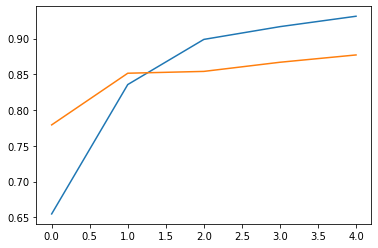

In [37]:
# Plot the training and validation accuracy
plt.plot(history.epoch, history.history['accuracy'], label = 'training')
plt.plot(history.epoch, history.history['val_accuracy'], label = 'validation')